In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_csv('sales_data.csv',index_col=[3],parse_dates=True,squeeze=True)
sales.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,
2010-05-02,0,1,1,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
2010-12-02,1,1,1,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2010-02-19,2,1,1,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
2010-02-26,3,1,1,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
2010-05-03,4,1,1,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [3]:
sales.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

In [3]:
cols = ['Unnamed: 0']
sales.drop(cols, axis=1, inplace = True)
sales.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
2010-12-02,1,1,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2010-02-19,1,1,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
2010-02-26,1,1,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
2010-05-03,1,1,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


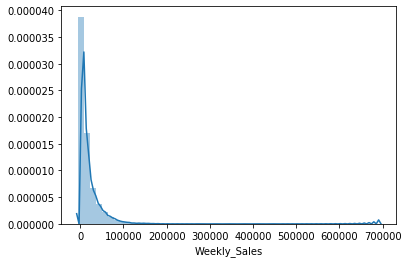

In [5]:
sns.distplot(sales['Weekly_Sales'])

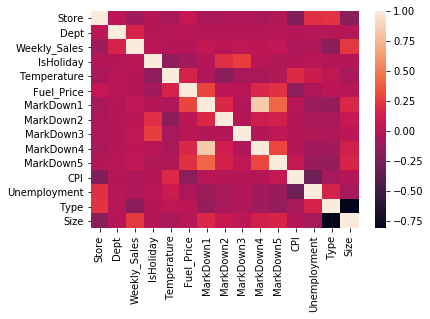

In [6]:
sns.heatmap(sales.corr())

Every column should be perfectly correlated with itself.

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-05-02 to 2012-10-26
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  int64  
 14  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4)
memory usage: 48.6 MB


In [4]:
X = sales[['Store', 'Dept', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]
y = sales['Weekly_Sales']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lm.intercept_)

4519.558199420504


In [11]:
print(lm.coef_)

[-9.22959286e+01  1.11369257e+02  7.74217990e+02  5.02765606e+01
 -5.79783886e+02  7.02226579e-03 -4.78764293e-03  1.01202827e-01
 -1.23600945e-03  9.07160501e-02 -2.28769409e+01 -2.11750853e+02
  1.86221897e+03  1.02283941e-01]


In [12]:
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [13]:
c_sales = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
c_sales

,Coeff
Store,-92.295929
Dept,111.369257
IsHoliday,774.217990
Temperature,50.276561
Fuel_Price,-579.783886
MarkDown1,0.007022
MarkDown2,-0.004788
MarkDown3,0.101203
MarkDown4,-0.001236
MarkDown5,0.090716


For example, If all other features are fixed, 1 unit increase in Type will result in 1862.218965 increase in Weekly_Sales.
Similarly, 1 unit increase in Fuel_Price will result in 579.783886 decrease in Weekly_Sales.

### Predictions

In [14]:
predictions = lm.predict(X_test)

In [15]:
predictions

array([20798.66046769, 20748.29110964,  2258.83580141, ...,
       13129.28429248, 14765.6359407 ,  9334.80200511])

In [16]:
y_test

Date
2012-06-01    50932.42
2012-09-03     3196.12
2011-05-27    10125.03
2010-12-03     3311.26
2010-10-29     6335.65
                ...   
2012-05-18    10089.45
2010-05-21     4283.24
2011-08-07    58317.53
2011-01-28      229.00
2010-05-28     3443.32
Name: Weekly_Sales, Length: 126471, dtype: float64

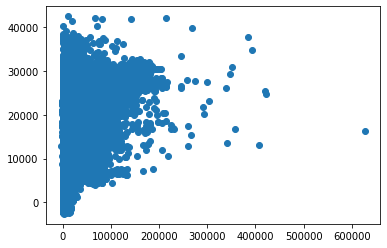

In [17]:
plt.scatter(y_test,predictions)

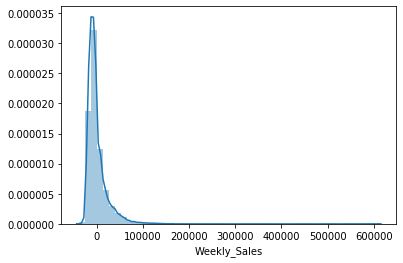

In [18]:
sns.distplot((y_test-predictions))

### Regression Evaluation Metrics

**1. Mean Absolute Error** 

**2. Mean Squared Error**

**3. Root Mean Squared Error**

In [19]:
from sklearn import metrics

In [20]:
metrics.mean_absolute_error(y_test,predictions)

14559.984761733705

In [21]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

21778.298888806603

In [22]:
accuracy = lm.score(X_test,y_test)
print("Linear Regression Accuracy: ",round(accuracy*100,3),'%')

Linear Regression Accuracy:  8.735 %


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rand_for = RandomForestRegressor()

In [34]:
rand_for.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
rand_for_score= rand_for.score(X_test,y_test)

In [36]:
accuracy = round((rand_for_score*100),3)

In [37]:
print("Random Forest Accuracy : ", accuracy, "%")

Random Forest Accuracy :  94.209 %


In [38]:
gra_boo = GradientBoostingRegressor()

In [39]:
gra_boo.fit(X_train,y_train)
gra_boo_score =gra_boo.score(X_test,y_test)

In [40]:
accuracy = round((gra_boo_score*100),3)

In [41]:
print("Gradient Booster Accuracy : ", accuracy, "%")

Gradient Booster Accuracy :  73.554 %
